In [0]:
#loading the data
from google.colab import files
uploaded = files.upload()

Saving Dataset_1_Team_38.csv to Dataset_1_Team_38 (2).csv


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd

In [0]:
#to pandas
import io
data_ = pd.read_csv(io.BytesIO(uploaded['Dataset_1_Team_38.csv']))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#spliting the data into test and train
data_train, data_test = train_test_split(data_, test_size = 0.2)

In [0]:
#converting the data to n-dimension arrays from pandas
data_test = data_test.values
data_0 = data_train[data_train['Class_label'] == 0]
data_1 = data_train[data_train['Class_label'] == 1]
data_2 = data_train[data_train['Class_label'] == 2]
data_train = data_train.values
data_0 = data_0.values
data_1 = data_1.values
data_2 = data_2.values
X_train = data_train[:, 0:2]

In [0]:
#prior probabilities
p0 = data_0.shape[0]/data_train.shape[0]
p1 = data_1.shape[0]/data_train.shape[0]
p2 = data_2.shape[0]/data_train.shape[0]

In [0]:
#means
mu0 = np.mean(data_0[:, 0:2], axis=0)
mu1 = np.mean(data_1[:, 0:2], axis=0)
mu2 = np.mean(data_2[:, 0:2], axis=0)

In [0]:
#loss function
L = np.array([[0, 2, 1],
              [2, 0, 3],
              [1, 3, 0]])

In [0]:
n = data_train.shape[0]
def CovMat(X1, X2):
  #covariance matrix calculation
  covXX = np.dot(np.transpose(X1 - np.mean(X1)), (X1 - np.mean(X1)))/n
  covXY = np.dot(np.transpose(X1 - np.mean(X1)), (X2 - np.mean(X2)))/n
  covYY = np.dot(np.transpose(X2 - np.mean(X2)), (X2 - np.mean(X2)))/n

  Cov = np.array([[covXX, covXY],
                  [covXY, covYY]])
  return(Cov)

In [0]:
#covariance matrix for all cases
#case 1: Naive Bayes Classifier with identity covariance
CovNBIden0 = np.array([[1, 0],[0, 1]])
CovNBIden1 = np.array([[1, 0],[0, 1]])
CovNBIden2 = np.array([[1, 0],[0, 1]])

#case 2: Naive Bayes Classifier with same covariance
CovNBSame0 = CovMat(X_train[:, 0], X_train[:, 1])
CovNBSame0 = np.array([[CovNBSame0[0,0], 0], [0, CovNBSame0[1,1]]])
CovNBSame1 = CovNBSame0
CovNBSame2 = CovNBSame0

#case 3: Naive Bayes Classifier with difference covariance
CovNBDiff0 = CovMat(data_0[:, 0], data_0[:, 1])
CovNBDiff0 = np.array([[CovNBDiff0[0,0], 0], [0, CovNBDiff0[1,1]]])
CovNBDiff1 = CovMat(data_1[:, 0], data_1[:, 1])
CovNBDiff1 = np.array([[CovNBDiff1[0,0], 0], [0, CovNBDiff1[1,1]]])
CovNBDiff2 = CovMat(data_2[:, 0], data_2[:, 1])
CovNBDiff2 = np.array([[CovNBDiff2[0,0], 0], [0, CovNBDiff2[1,1]]])

#case 4: Bayes Classifier with same covariance
CovBCSame0 = CovMat(X_train[:, 0], X_train[:, 1])
CovBCSame1 = CovBCSame0
CovBCSame2 = CovBCSame0

#case 5: Bayes Classifier with different covariance
CovBCDiff0 = CovMat(data_0[:, 0], data_0[:, 1])
CovBCDiff1 = CovMat(data_1[:, 0], data_1[:, 1])
CovBCDiff2 = CovMat(data_2[:, 0], data_2[:, 1])

In [0]:
def BiNormDis(X, muI, covI):
  #class conditional probabilities function
  detCovI = covI[0,0]*covI[1,1] - covI[0,1]*covI[1,0]
  X = X[0:2]
  fXI = np.exp(-0.5*np.dot(np.dot(np.transpose(X - muI), np.linalg.inv(covI)), (X - muI)))/np.sqrt(detCovI*(2*np.pi))

  return(fXI)

In [0]:
def BayesClassi(X, mu0, mu1, mu2, cov0, cov1, cov2, oper):
  #class conditional probabilities
  fx0 = BiNormDis(X, muI = mu0, covI = cov0)
  fx1 = BiNormDis(X, muI = mu1, covI = cov1)
  fx2 = BiNormDis(X, muI = mu2, covI = cov2)
  #posterior probabilities
  q0 = p0*fx0 / (p0*fx0 + p1*fx1 + p2*fx2)
  q1 = p1*fx1 / (p0*fx0 + p1*fx1 + p2*fx2)
  q2 = p2*fx2 / (p0*fx0 + p1*fx1 + p2*fx2)

  q = np.array([q0, q1, q2])
  R0 = np.dot(q, np.transpose(L[0]))
  R1 = np.dot(q, np.transpose(L[1]))
  R2 = np.dot(q, np.transpose(L[2]))

  #classification
  if oper == 0:
    if (R0 < R1) and (R0 < R2):
      allot = 0
    elif (R1 <= R0) and (R1 < R2):
      allot = 1
    else:
      allot = 2
  #boundary classification
  else:
    if R0 == min(R0, R1, R2):
      allot = fx0
    elif R1 == min(R0, R1, R2):
      allot = fx1
    else:
      allot = fx2

  return(allot)

In [0]:
def PredictorBC(X, mu0, mu1, mu2, cov0, cov1, cov2):
  pred = np.zeros(X.shape[0])
  #predicting the class
  for i in range(0, X.shape[0]):
    pred[i] += BayesClassi(X[i], mu0, mu1, mu2, cov0, cov1, cov2, 0)
  
  correct = 0
  incorrect = 0
  #calculating accuracy
  for i in range(0, pred.shape[0]):
    if pred[i] == X[i, 2]:
      correct += 1
    else:
      incorrect += 1
  accuracy = correct / X.shape[0]
  
  return(pred, accuracy)

In [0]:
#predictions
#case 1: Naive Bayes Classifier with Identity covariance
PredNBIdenTrain, AccNBIdenTrain = PredictorBC(data_train, mu0, mu1, mu2, CovNBIden0, CovNBIden1, CovNBIden2)
PredNBIdenTest, AccNBIdenTest = PredictorBC(data_test, mu0, mu1, mu2, CovNBIden0, CovNBIden1, CovNBIden2)
print('NBIdentity train dataset accuracy: ', AccNBIdenTrain)
print('NBIdentity test dataset accuracy: ', AccNBIdenTest)

#case 2: Naive Bayes Classifier with same covariance
PredNBSameTrain, AccNBSameTrain = PredictorBC(data_train, mu0, mu1, mu2, CovNBSame0, CovNBSame1, CovNBSame2)
PredNBSameTest, AccNBSameTest = PredictorBC(data_test, mu0, mu1, mu2, CovNBSame0, CovNBSame1, CovNBSame2)
print('NBSame train dataset accuracy: ', AccNBSameTrain)
print('NBSame test dataset accuracy: ', AccNBSameTest)

#case 3: Naive Bayes Classifier with different covariance
PredNBDiffTrain, AccNBDiffTrain = PredictorBC(data_train, mu0, mu1, mu2, CovNBDiff0, CovNBDiff1, CovNBDiff2)
PredNBDiffTest, AccNBDiffTest = PredictorBC(data_test, mu0, mu1, mu2, CovNBDiff0, CovNBDiff1, CovNBDiff2)
print('NBDifferent train dataset accuracy: ', AccNBDiffTrain)
print('NBDifferent test dataset accuracy: ', AccNBDiffTest)

#case 4: Bayes Classifier with same covariance
PredBCSameTrain, AccBCSameTrain = PredictorBC(data_train, mu0, mu1, mu2, CovBCSame0, CovBCSame1, CovBCSame2)
PredBCSameTest, AccBCSameTest = PredictorBC(data_test, mu0, mu1, mu2, CovBCSame0, CovBCSame1, CovBCSame2)
print('BCSame train dataset accuracy: ', AccBCSameTrain)
print('BCSame test dataset accuracy: ', AccBCSameTest)

#case 5: Naive Bayes Classifier with different covariance
PredBCDiffTrain, AccBCDiffTrain = PredictorBC(data_train, mu0, mu1, mu2, CovBCDiff0, CovBCDiff1, CovBCDiff2)
PredBCDiffTest, AccBCDiffTest = PredictorBC(data_test, mu0, mu1, mu2, CovBCDiff0, CovBCDiff1, CovBCDiff2)
print('BCDifferent train dataset accuracy: ', AccBCDiffTrain)
print('BCDifferent test dataset accuracy: ', AccBCDiffTest)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


1790 1810 3600
454 446 900
NBIdentity train dataset accuracy:  0.49722222222222223
NBIdentity test dataset accuracy:  0.5044444444444445
3486 114 3600
870 30 900
NBSame train dataset accuracy:  0.9683333333333334
NBSame test dataset accuracy:  0.9666666666666667
3486 114 3600
869 31 900
NBDifferent train dataset accuracy:  0.9683333333333334
NBDifferent test dataset accuracy:  0.9655555555555555
3486 114 3600
869 31 900
BCSame train dataset accuracy:  0.9683333333333334
BCSame test dataset accuracy:  0.9655555555555555
3486 114 3600
869 31 900
BCDifferent train dataset accuracy:  0.9683333333333334
BCDifferent test dataset accuracy:  0.9655555555555555


In [0]:
#confusion matrix
ConfMat = np.zeros((3, 3))
for i in range(0, PredBCDiffTest.shape[0]):
  pred = int(PredBCDiffTest[i])
  label = int(data_test[i, 2])
  if pred == label:
    ConfMat[pred, pred] += 1
  else:
    ConfMat[pred, label] += 1

print('Confusion Matrix: \n', ConfMat)

Confusion Matrix: 
 [[295.   3.   5.]
 [  2. 291.   7.]
 [  5.   9. 283.]]


In [0]:
#setting up the dimensions of the plots
X1 = np.arange(-650, 650, 2)
X2 = np.arange(-350, 950, 2)
X1, X2 = np.meshgrid(X1, X2)
TempMat = np.zeros((X1.shape[0]**2, 2))
TempMat[:, 0], TempMat[:, 1] = X1.reshape(X1.shape[0]**2), X2.reshape(X2.shape[0]**2)

(650, 650)


In [0]:
#decision surface
DecSurf = np.zeros(TempMat.shape[0])
for i in range(0, DecSurf.shape[0]):
  DecSurf[i] += BayesClassi(TempMat[i], mu0, mu1, mu2, CovBCDiff0, CovBCDiff1, CovBCDiff2, 0)

DecSurf = DecSurf.reshape(X1.shape[0], X1.shape[1])

In [0]:
#decision booundary
DecBound = np.zeros(TempMat.shape[0])
for i in range(0, DecBound.shape[0]):
  DecBound[i] += BayesClassi(TempMat[i], mu0, mu1, mu2, CovBCDiff0, CovBCDiff1, CovBCDiff2, 1)

DecBound = DecBound.reshape(X1.shape[0], X1.shape[1])

(650, 650)


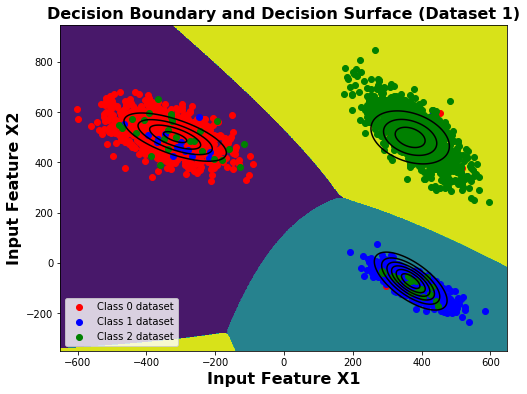

In [0]:
#decision bound and surface plot
plt.figure(1, figsize=[8,6])
plt.contourf(X1, X2, DecSurf)
plt.contour(X1, X2, DecBound, colors = 'k')
scatter_0 = plt.scatter(data_0[:, 0], data_0[:, 1], color = 'red', label='Class 0 dataset')
scatter_1 = plt.scatter(data_1[:, 0], data_1[:, 1], color = 'blue', label='Class 1 dataset')
scatter_2 = plt.scatter(data_2[:, 0], data_2[:, 1], color = 'green', label='Class 2 dataset')
plt.xlabel('Input Feature X1', fontweight='bold', fontsize=16)
plt.ylabel('Input Feature X2', fontweight='bold', fontsize=16)
plt.legend(handles = [scatter_0, scatter_1, scatter_2], loc = 'lower left')
plt.title('Decision Boundary and Decision Surface (Dataset 1)', fontweight='bold', fontsize=16)
plt.savefig('bc-data2-dbds.png')
files.download('bc-data2-dbds.png')

In [0]:
DecBound_0 = np.zeros(DecBound.shape)
DecBound_1 = np.zeros(DecBound.shape)
DecBound_2 = np.zeros(DecBound.shape)

for i in range(DecSurf.shape[0]):
  for j in range(DecSurf.shape[1]):
    if DecSurf[i, j] == 0:
      DecBound_0[i, j] = DecBound[i, j]
    elif DecSurf[i, j] == 1:
      DecBound_1[i, j] = DecBound[i, j]
    else:
      DecBound_2[i, j] = DecBound[i, j]

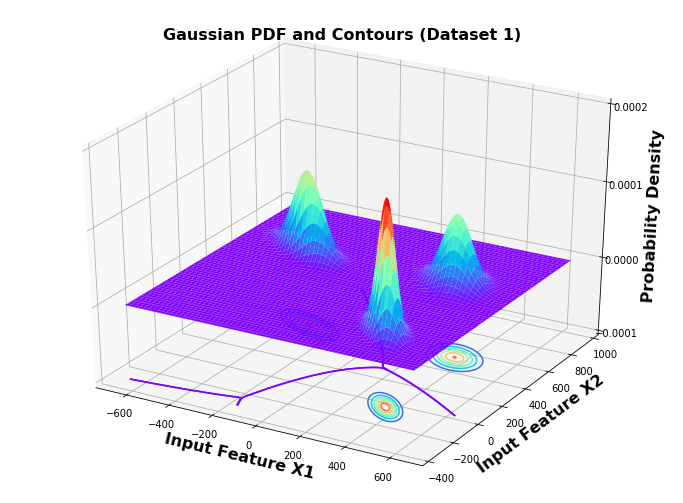

In [0]:
fig = plt.figure(2, figsize = [12, 9])
ax = fig.gca(projection = '3d')
ax.plot_surface(X1, X2, DecBound, rstride = 10, cstride = 10, linewidth = 1, antialiased = True, cmap = cm.rainbow)
ax.contour(X1, X2, DecBound_0, zdir = 'z', offset = -0.0001, cmap = cm.rainbow)
ax.contour(X1, X2, DecBound_1, zdir = 'z', offset = -0.0001, cmap = cm.rainbow)
ax.contour(X1, X2, DecBound_2, zdir = 'z', offset = -0.0001, cmap = cm.rainbow)
ax.set_zticks(np.linspace(-0.0001, 0.0002, 4))
# ax.view_init(20, -38) #to change the orientation
plt.xlabel('Input Feature X1', fontweight='bold', fontsize=16)
plt.ylabel('Input Feature X2', fontweight='bold', fontsize=16)
ax.set_zlabel('Probability Density', labelpad = 9, fontweight='bold', fontsize=16)
plt.title('Gaussian PDF and Contours (Dataset 1)', fontweight='bold', fontsize=16)
plt.savefig('bc-data2-gpdc.png')
files.download('bc-data2-gpdc.png')

In [0]:
#eigenvalues and eigenvectors
evalues_0, evect_0 = np.linalg.eig(CovBCDiff0)
evalues_1, evect_1 = np.linalg.eig(CovBCDiff1)
evalues_2, evect_2 = np.linalg.eig(CovBCDiff2)

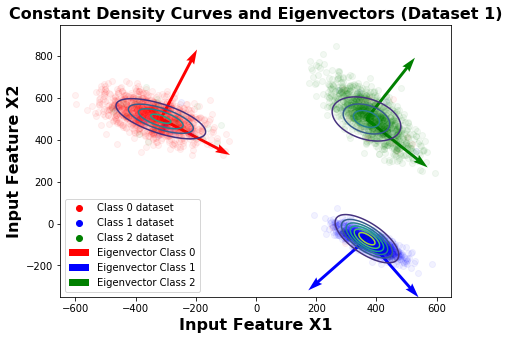

In [0]:
plt.figure(3, figsize=[7,5])
origin_0 = [mu0[0]], [mu0[1]]
origin_1 = [mu1[0]], [mu1[1]]
origin_2 = [mu2[0]], [mu2[1]]
eigvec_0 = plt.quiver(*origin_0, evect_0[0], evect_0[1], color = ['r', 'r'], scale = 5, label = 'Eigenvector Class 0')
eigvec_1 = plt.quiver(*origin_1, evect_1[0], evect_1[1], color = ['b', 'b'], scale = 5, label = 'Eigenvector Class 1')
eigvec_2 = plt.quiver(*origin_2, evect_2[0], evect_2[1], color = ['g', 'g'], scale = 5, label = 'Eigenvector Class 2')
plt.contour(X1, X2, DecBound)
scatter_f0 = plt.scatter(data_0[:, 0], data_0[:, 1], color = 'red', alpha = 0.05, label='Class 0 dataset')
scatter_f1 = plt.scatter(data_1[:, 0], data_1[:, 1], color = 'blue', alpha = 0.05, label='Class 1 dataset')
scatter_f2 = plt.scatter(data_2[:, 0], data_2[:, 1], color = 'green', alpha = 0.05, label='Class 2 dataset')
plt.xlabel('Input Feature X1', fontweight='bold', fontsize=16)
plt.ylabel('Input Feature X2', fontweight='bold', fontsize=16)
plt.legend(handles = [scatter_0, scatter_1, scatter_2, eigvec_0, eigvec_1, eigvec_2], loc = 'lower left')
plt.title('Constant Density Curves and Eigenvectors (Dataset 1)', fontweight='bold', fontsize=16)
plt.savefig('bc-data2-cdce.png')
files.download('bc-data2-cdce.png')